In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sns.set(font_scale = 1.5)
sns.set_style("white")

### Constraint function

Currently, all constraints between agents have a binary quadratic form:
$ax^2 + bxy + cy^2$

The coefficients $a$, $b$, and $c$ are set to 1 on initialization but when a change constraint event is received, the coefficients are sampled between $[0, 1]$ for each one and kept until another constraint change event happens.

### Load data

In [28]:
# ours
dg_ccocoa_df = pd.read_csv('max-deg-3-graph-5-1649212769.207123-c-cocoa--max-deg-3merged-metrics.csv')
# dg_csdpop_df = pd.read_csv('../metrics/c-sdpop-d3Lr0.1.csv')
# dg_sdpop_df_d3 = pd.read_csv('../metrics/sdpop-d3Lr0.05.csv')
# dg_sdpop_df_d40 = pd.read_csv('../metrics/sdpop-d40Lr0.05.csv')
# dg_nodcop_df = pd.read_csv('../metrics/dcop-base-d3Lr0.05.csv')

# baselines
ccocoa_df = pd.read_csv('c-cocoa-max-deg-3-graph-5-1649212769.207123c-cocoa-max-deg-3-merged-metrics.csv')

#### data stats

In [25]:
# dg_ccocoa_df.shape, dg_csdpop_df.shape, dg_sdpop_df_d3.shape, dg_sdpop_df_d40.shape, dg_nodcop_df.shape, ccocoa_df.shape
dg_ccocoa_df.shape, ccocoa_df.shape

((120, 29), (120, 7))

### chart funcs

In [26]:
def show_event_markers(axis, event_df, metric):
    for i, row in event_df.iterrows():
        if row['type'] == 'add_agent':
            ax.scatter(i, dg_ccocoa_df[metric][i], color='black', marker='o')
#             ax.scatter(i, dg_csdpop_df[metric][i], color='black', marker='o')
    #         ax.scatter(i, dg_sdpop_df[metric][i], color='black', marker='o')
            if metric not in ['num_changes']:
                ax.scatter(i, ccocoa_df[metric][i], color='black', marker='o')
        elif row['type'] == 'change_constraint':
            ax.scatter(i, dg_ccocoa_df[metric][i], color='blue', marker='x')
#             ax.scatter(i, dg_csdpop_df[metric][i], color='blue', marker='x')
    #         ax.scatter(i, dg_sdpop_df[metric][i], color='blue', marker='x')
            if metric not in ['num_changes']:
                ax.scatter(i, ccocoa_df[metric][i], color='blue', marker='x')
        else:
            ax.scatter(i, dg_ccocoa_df[metric][i], color='red', marker='^')
#             ax.scatter(i, dg_csdpop_df[metric][i], color='red', marker='^')
    #         ax.scatter(i, dg_sdpop_df[metric][i], color='red', marker='^')    
            if metric not in ['num_changes']:
                ax.scatter(i, ccocoa_df[metric][i], color='red', marker='^')

### Solution cost

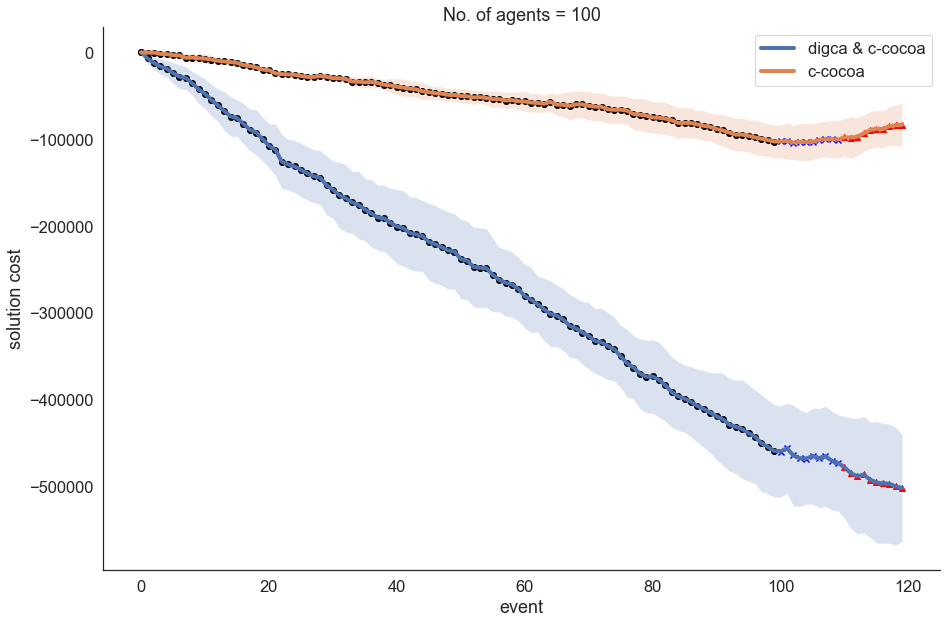

In [41]:
fig, ax = plt.subplots(figsize=(15,10))

plt.plot(dg_ccocoa_df['edge_cost'], label='digca & c-cocoa', linewidth=4)
plt.fill_between(
    np.arange(0, len(dg_ccocoa_df['edge_cost'])), 
    dg_ccocoa_df['edge_cost']-dg_ccocoa_df['edge_cost-std'], 
    dg_ccocoa_df['edge_cost']+dg_ccocoa_df['edge_cost-std'], 
    alpha=.2
)

# plt.plot(dg_csdpop_df['edge_cost'], label='dynagraph & c-sdpop')
# plt.plot(dg_sdpop_df['edge_cost'], label='dynagraph & sdpop')

plt.plot(ccocoa_df['edge_cost'], label='c-cocoa', linewidth=4)
plt.fill_between(
    np.arange(0, len(dg_ccocoa_df['edge_cost'])), 
    ccocoa_df['edge_cost'] - ccocoa_df['edge_cost-std'], 
    ccocoa_df['edge_cost'] + ccocoa_df['edge_cost-std'], 
    alpha=.2
)

plt.ylabel('solution cost')
plt.xlabel('event')
plt.legend()
plt.title('No. of agents = 100')
show_event_markers(ax, dg_ccocoa_df, metric='edge_cost')
sns.despine(offset=0)
plt.show()

### Messages

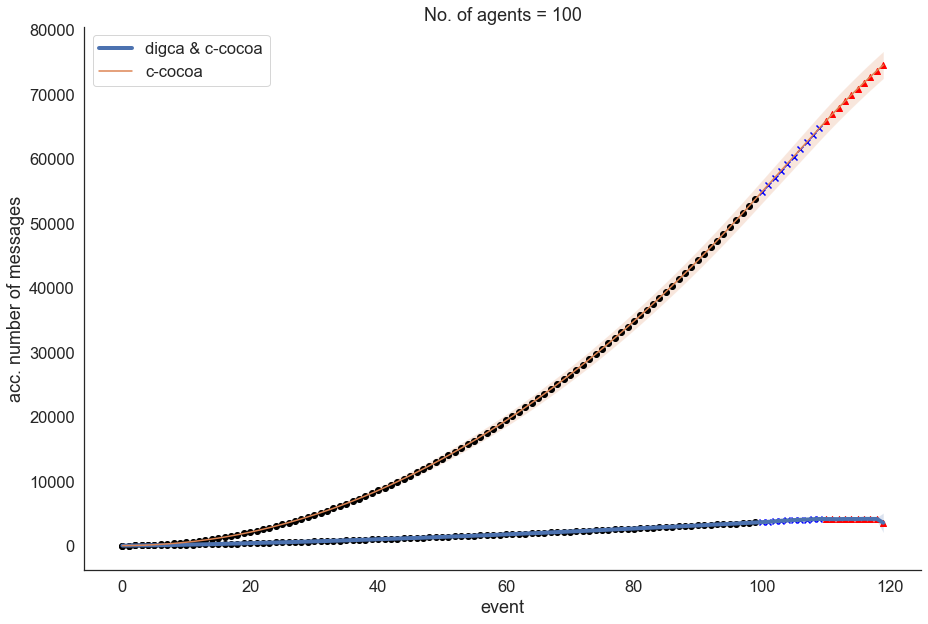

In [42]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(dg_ccocoa_df['message_count'], label='digca & c-cocoa', linewidth=4)
plt.fill_between(
    np.arange(0, len(dg_ccocoa_df['message_count'])), 
    dg_ccocoa_df['message_count'] - dg_ccocoa_df['message_count-std'], 
    dg_ccocoa_df['message_count'] + dg_ccocoa_df['message_count-std'], 
    alpha=.2
)

# plt.plot(dg_csdpop_df['message_count'], label='dynagraph & c-sdpop')
# plt.plot(dg_sdpop_df['message_count'], label='dynagraph & sdpop')
# plt.plot(dg_nodcop_df['message_count'], label='dynagraph')

plt.plot(ccocoa_df['message_count'], label='c-cocoa')
plt.fill_between(
    np.arange(0, len(dg_ccocoa_df['message_count'])), 
    ccocoa_df['message_count'] - ccocoa_df['message_count-std'], 
    ccocoa_df['message_count'] + ccocoa_df['message_count-std'], 
    alpha=.2
)

plt.ylabel('acc. number of messages')
plt.xlabel('event')
plt.legend()
plt.title('No. of agents = 100')
show_event_markers(ax, dg_ccocoa_df, metric='message_count')
sns.despine(offset=0)
plt.show()

### $\Delta$-Changes

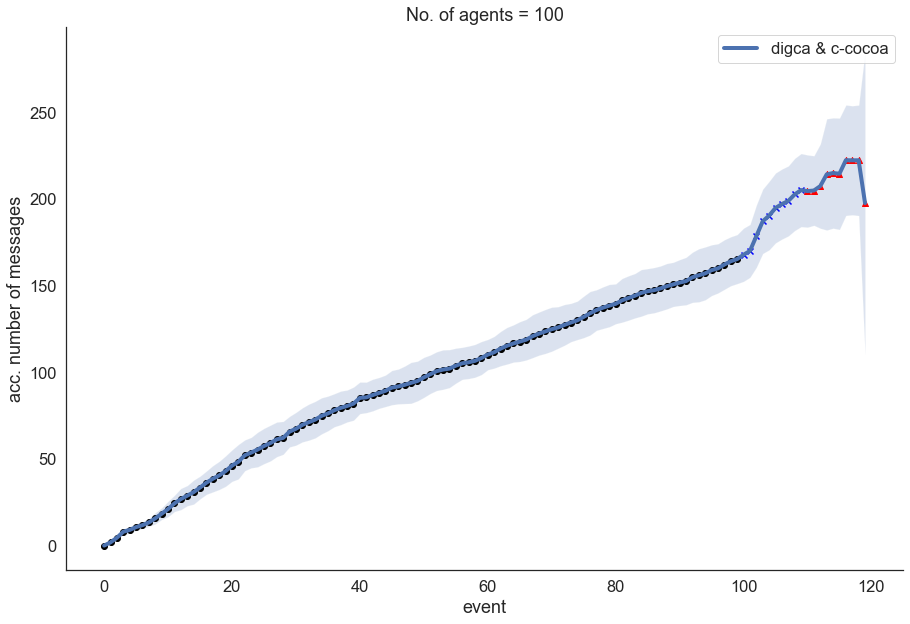

In [43]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(dg_ccocoa_df['num_changes'], label='digca & c-cocoa', linewidth=4)
plt.fill_between(
    np.arange(0, len(dg_ccocoa_df['num_changes'])), 
    dg_ccocoa_df['num_changes'] - dg_ccocoa_df['num_changes-std'], 
    dg_ccocoa_df['num_changes'] + dg_ccocoa_df['num_changes-std'], 
    alpha=.2
)

# plt.plot(dg_csdpop_df['message_count'], label='dynagraph & c-sdpop')
# plt.plot(dg_sdpop_df['message_count'], label='dynagraph & sdpop')
# plt.plot(dg_nodcop_df['message_count'], label='dynagraph')

plt.ylabel('acc. number of messages')
plt.xlabel('event')
plt.legend()
plt.title('No. of agents = 100')
show_event_markers(ax, dg_ccocoa_df, metric='num_changes')
sns.despine(offset=0)
plt.show()